In [1]:
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Activation, Masking, Bidirectional, Flatten
from keras.optimizers import Adam
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
from keras.callbacks import TensorBoard

trainD = np.load("/home/hsiehch/30s/train_data.npy")
trainL = np.load("/home/hsiehch/30s/train_label.npy")
validationD = np.load("/home/hsiehch/30s/validation_data.npy")
validationL = np.load("/home/hsiehch/30s/validation_label.npy")
testD = np.load("/home/hsiehch/30s/test_data.npy")
testL = np.load("/home/hsiehch/30s/test_label.npy")

timestep = 30
seq = 300

trainData = trainD.reshape((trainD.shape[0], timestep, seq))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], timestep, seq))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], timestep, seq))
testLabel = np_utils.to_categorical(testL, 4)

print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (5078, 30, 300)
Train Label:  (5078, 4)
Vali Data:  (2032, 30, 300)
Vali Label:  (2032, 4)
Test Data:  (3041, 30, 300)
Test Label:  (3041, 4)


In [2]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape = (timestep, seq)))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Dense(4, activation="softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30, 32)            42624     
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 64)            24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               394240    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [3]:
adam = Adam(lr = 0.005)
model.compile(optimizer =adam, loss = "categorical_crossentropy", metrics=['accuracy'])
# graph = TensorBoard()
train_history = model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=100,
                          validation_data=(validationData, validationLabel),
                          #callbacks=[graph],
                          batch_size=9000,
                          #shuffle=False,
                          )


Train on 5078 samples, validate on 2032 samples
Epoch 1/100
5078/5078 [==============================] - 8s 2ms/step - loss: 1.3857 - acc: 0.2674 - val_loss: 1.2720 - val_acc: 0.5778
Epoch 2/100
5078/5078 [==============================] - 1s 246us/step - loss: 1.2713 - acc: 0.5776 - val_loss: 2.0728 - val_acc: 0.5704
Epoch 3/100
5078/5078 [==============================] - 1s 203us/step - loss: 1.9427 - acc: 0.5766 - val_loss: 1.1601 - val_acc: 0.5876
Epoch 4/100
5078/5078 [==============================] - 1s 219us/step - loss: 1.1624 - acc: 0.5762 - val_loss: 1.2299 - val_acc: 0.2938
Epoch 5/100
5078/5078 [==============================] - 1s 239us/step - loss: 1.2322 - acc: 0.3202 - val_loss: 1.2109 - val_acc: 0.2948
Epoch 6/100
5078/5078 [==============================] - 1s 214us/step - loss: 1.2126 - acc: 0.3011 - val_loss: 1.1574 - val_acc: 0.2948
Epoch 7/100
5078/5078 [==============================] - 1s 227us/step - loss: 1.1580 - acc: 0.3021 - val_loss: 1.0769 - val_acc: 0.

Epoch 61/100
5078/5078 [==============================] - 1s 229us/step - loss: 0.7443 - acc: 0.6857 - val_loss: 0.9536 - val_acc: 0.6186
Epoch 62/100
5078/5078 [==============================] - 1s 230us/step - loss: 0.7226 - acc: 0.6991 - val_loss: 1.0143 - val_acc: 0.5655
Epoch 63/100
5078/5078 [==============================] - 1s 235us/step - loss: 0.7387 - acc: 0.6887 - val_loss: 0.9689 - val_acc: 0.6216
Epoch 64/100
5078/5078 [==============================] - 1s 221us/step - loss: 0.7362 - acc: 0.6934 - val_loss: 0.9545 - val_acc: 0.6122
Epoch 65/100
5078/5078 [==============================] - 1s 218us/step - loss: 0.7178 - acc: 0.7044 - val_loss: 0.9926 - val_acc: 0.5856
Epoch 66/100
5078/5078 [==============================] - 1s 225us/step - loss: 0.7143 - acc: 0.7087 - val_loss: 1.0040 - val_acc: 0.6122
Epoch 67/100
5078/5078 [==============================] - 1s 234us/step - loss: 0.7110 - acc: 0.7032 - val_loss: 1.0064 - val_acc: 0.5974
Epoch 68/100
5078/5078 [==========

In [4]:
import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

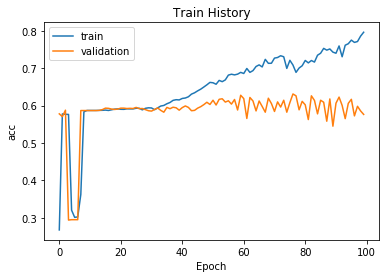

In [5]:
show_plot('acc', train_history)

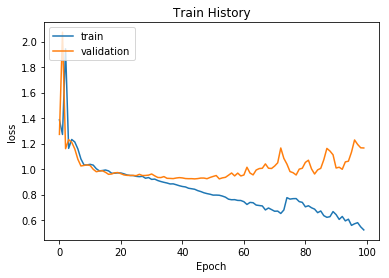

In [6]:
show_plot('loss', train_history)